In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

Epoch 1/5
563/563 [==============================] - 2s 3ms/step - loss: 1.6188 - accuracy: 0.5515 - val_loss: 0.6582 - val_accuracy: 0.8419
Epoch 2/5
563/563 [==============================] - 1s 2ms/step - loss: 0.5723 - accuracy: 0.8565 - val_loss: 0.4802 - val_accuracy: 0.8714
Epoch 3/5
563/563 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8852 - val_loss: 0.4159 - val_accuracy: 0.8845
Epoch 4/5
563/563 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8980 - val_loss: 0.3822 - val_accuracy: 0.8925
Epoch 5/5
313/313 [==============================] - 0s 651us/step - loss: 0.3323 - accuracy: 0.9052

loss_and_metrics : [0.33230915665626526, 0.9052000045776367]


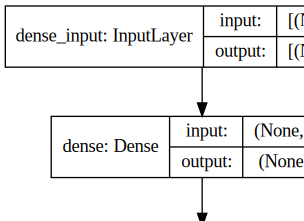

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

# 3. 모델 사용하기
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 8, Predict : 8
True : 0, Predict : 0
True : 4, Predict : 4
True : 0, Predict : 0
True : 5, Predict : 5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
